# Regression Predictions
In this module, we will illustrate how to make predictions by making splits in our data to make training and testsets and then evaluating our predictions using metrics like MAE, MSE, RMSE, MAPE.

### Libraries & Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [3]:
from sqlalchemy import create_engine

In [4]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [5]:

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_prices_df = pd.read_sql_query('select * from houseprices',con=engine)

In [7]:
engine.dispose()

## Data Preprocessing

In [9]:
# Encoding Variables and Concatenating them to DF
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", drop_first=True)], axis=1)
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.street, prefix="street", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(house_prices_df.street, prefix="street", drop_first=True).columns)

## OLS Model

In [12]:
# Split features into predictor and features
Y = house_prices_df['saleprice']
X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf'] + dummy_column_names]

# Add a constant term to features
X = sm.add_constant(X)

In [14]:
# Split dataset into testing and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

In [15]:
# Create OLS Model
results = sm.OLS(y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     383.1
Date:                Thu, 09 Jan 2020   Prob (F-statistic):               0.00
Time:                        20:38:58   Log-Likelihood:                -13972.
No. Observations:                1168   AIC:                         2.797e+04
Df Residuals:                    1157   BIC:                         2.802e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.039e+05   2.06e+04     -5.037      0.000   -1.44e+05   -6.34e+04
overallqual  2.433e+04   1244.706     19.548      0.000    2.19e+04    2.68e+04
grlivarea      43.3745      2.745     15.800      0.000      37.988      48.760
garagecars   1.407e+04   3409.600      4.126      0.000    7379.047    2.08e+04
garagearea     17.5210     11.560      1.516      0.130      -5.161      40.203
totalbsmtsf    23.4504      3.183      7.368      0.000      17.206      29.695
mszoning_FV  9666.6121   7497.913      1.289      0.198   -5044.416    2.44e+04
mszoning_FV  9666.6121   7497.913      1.289      0.198   -5044.416    2.44e+04
mszoning_RH  3652.7539   8575.600      0.426      0.670   -1.32e+04    2.05e+04
mszoning_RH  3652.7539   8575.600      0.426      0.670   -1.32e+04    2.05e+04
mszoning_RL  1.215e+04   6951.547      1.747      0.081   -1491.739    2.58e+04
mszoning_RL  1.215e+04   6951.547      1.747      0.081   -1491.739    2.58e+04
mszoning_RM  1432.1535   7054.236      0.203      0.839   -1.24e+04    1.53e+04
mszoning_RM  1432.1535   7054.236      0.203      0.839   -1.24e+04    1.53e+04
street_Pave -4088.8341   8703.993     -0.470      0.639   -2.12e+04     1.3e+04
street_Pave -4088.8341   8703.993     -0.470      0.639   -2.12e+04     1.3e+04
==============================================================================
Omnibus:                      355.774   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30190.746
Skew:                          -0.383   Prob(JB):                         0.00
Kurtosis:                      27.895   Cond. No.                     2.45e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.82e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

We see from the above a number of variables with high p-values that we can consider removing from our feature set using backward elimination or some other form of elimination. Our R-squared value is quite high despite this at around 0.77, meaning our model does a decent job of explaining the variance in our dataset. Our AIC and BIC scores are still high, and we should look to a model that would reduce these significantly.

Before that, let us make predictions with our model of the house price:

In [16]:
# Make predictions
y_preds = results.predict(X_test)

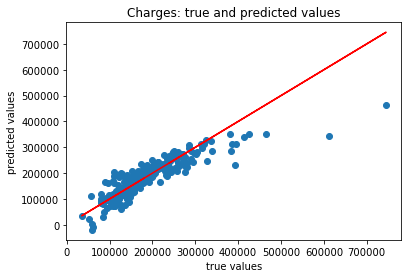

In [17]:
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

In [18]:
# Evaluate using metrics
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Mean absolute error of the prediction is: 25546.80382859001
Mean squared error of the prediction is: 1559083821.973025
Root mean squared error of the prediction is: 39485.23549344774
Mean absolute percentage error of the prediction is: 15.55142034753851


## Improved OLS Model

In [21]:
house_prices_df['totalsf'] = house_prices_df['totalbsmtsf'] + house_prices_df['firstflrsf'] + house_prices_df['secondflrsf']
house_prices_df['int_over_sf'] = house_prices_df['totalsf'] * house_prices_df['overallqual']

In [20]:
# Log of target variable
Y = np.log1p(house_prices_df['saleprice'])
X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalsf', 'int_over_sf'] + dummy_column_names]

In [22]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

results = sm.OLS(y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     520.9
Date:                Thu, 09 Jan 2020   Prob (F-statistic):               0.00
Time:                        20:42:09   Log-Likelihood:                 463.99
No. Observations:                1168   AIC:                            -904.0
Df Residuals:                    1156   BIC:                            -843.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.9162      0.102     97.518      0.000       9.717      10.116
overallqual     0.1893      0.009     20.123      0.000       0.171       0.208
grlivarea     9.58e-05   1.89e-05      5.074      0.000    5.88e-05       0.000
garagecars      0.0779      0.015      5.244      0.000       0.049       0.107
garagearea      0.0001   5.04e-05      2.132      0.033    8.57e-06       0.000
totalsf         0.0003   2.58e-05     11.139      0.000       0.000       0.000
int_over_sf -2.572e-05   3.02e-06     -8.526      0.000   -3.16e-05   -1.98e-05
mszoning_FV     0.1956      0.032      6.055      0.000       0.132       0.259
mszoning_FV     0.1956      0.032      6.055      0.000       0.132       0.259
mszoning_RH     0.1325      0.037      3.593      0.000       0.060       0.205
mszoning_RH     0.1325      0.037      3.593      0.000       0.060       0.205
mszoning_RL     0.1939      0.030      6.481      0.000       0.135       0.253
mszoning_RL     0.1939      0.030      6.481      0.000       0.135       0.253
mszoning_RM     0.1078      0.030      3.556      0.000       0.048       0.167
mszoning_RM     0.1078      0.030      3.556      0.000       0.048       0.167
street_Pave    -0.0278      0.037     -0.744      0.457      -0.101       0.046
street_Pave    -0.0278      0.037     -0.744      0.457      -0.101       0.046
==============================================================================
Omnibus:                      350.711   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2714.386
Skew:                          -1.167   Prob(JB):                         0.00
Kurtosis:                      10.094   Cond. No.                     1.55e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.72e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

We have made improvements here with this model. Our R-squared values are higher and our AIC and BIC values are lower. Let us make an evaluation of our new model:

In [23]:
y_preds = results.predict(X_test)

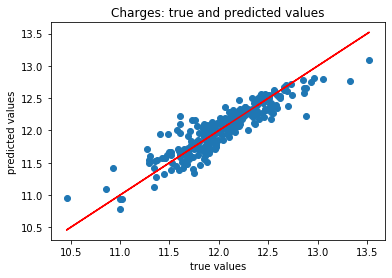

In [24]:
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

In [25]:
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Mean absolute error of the prediction is: 0.1257037287286365
Mean squared error of the prediction is: 0.02919212187140597
Root mean squared error of the prediction is: 0.17085702172110448
Mean absolute percentage error of the prediction is: 1.050357766782342


From our evaluation metrics, we can see that we have performed better with our second improved model where we removed a number of features with high p-values and also with our log transformed saleprice.